<a href="https://colab.research.google.com/github/kdw9687/CapstonePBL_Predict_Movie/blob/main/Random_forest_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
pd.set_option('display.max_colwidth',None)
pd.set_option('display.max_rows',None)
from google.colab import drive
drive.mount('/content/drive')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
plt.rc('font', family='AppleGothic') 
matplotlib.rcParams['axes.unicode_minus'] = False
from matplotlib import font_manager, rc
import platform
file='/content/drive/MyDrive/Colab Notebooks/데이터 판다스용완.csv'
data=pd.read_csv(file)
from sklearn import preprocessing
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fm._rebuild()
plt.rc('font', family='NanumGothic')
for fontInfo in fm.fontManager.ttflist:
    if 'Nanum' in fontInfo.name:
        print(fontInfo.name+" = "+fontInfo.fname)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare = /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEco.ttf
NanumSquareRound = /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumGothicCoding = /usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf
NanumGothic Eco = /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
NanumGothic = /usr/share/fonts/truetype/nanum/NanumGothicBold.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumMyeongjo = /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunGothic = /usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf
NanumMyeongjo Eco = /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumGothicCoding = /usr/sha

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.drop(columns=['순번','장르','국적.1','연휴 및 기념일 상영 여부','수상'],inplace=True)

In [ ]:
data.set_index('영화명',inplace=True)

In [ ]:
corr=data.corr()

In [ ]:
target=data['전국 관객수']
target.dropna(inplace=True)

In [ ]:
x=data.drop(columns=['전국 매출액','전국 관객수'])
y=target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)
k=y_train
for i in range(len(k)):
    if k[i]<1000000:
        k[i]=0
    elif k[i]>=1000000 and k[i]<3000000:
        k[i]=1
    elif k[i]>=3000000 and k[i]<6000000:
        k[i]=2
    else:
        k[i]=3
y_train=k
k=y_test
for i in range(len(k)):
    if k[i]<1000000:
        k[i]=0
    elif k[i]>=1000000 and k[i]<3000000:
        k[i]=1
    elif k[i]>=3000000 and k[i]<6000000:
        k[i]=2
    else:
        k[i]=3

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=5000,max_depth=5)
model.fit(x_train, y_train)
model.score(x_test,y_test)

0.68

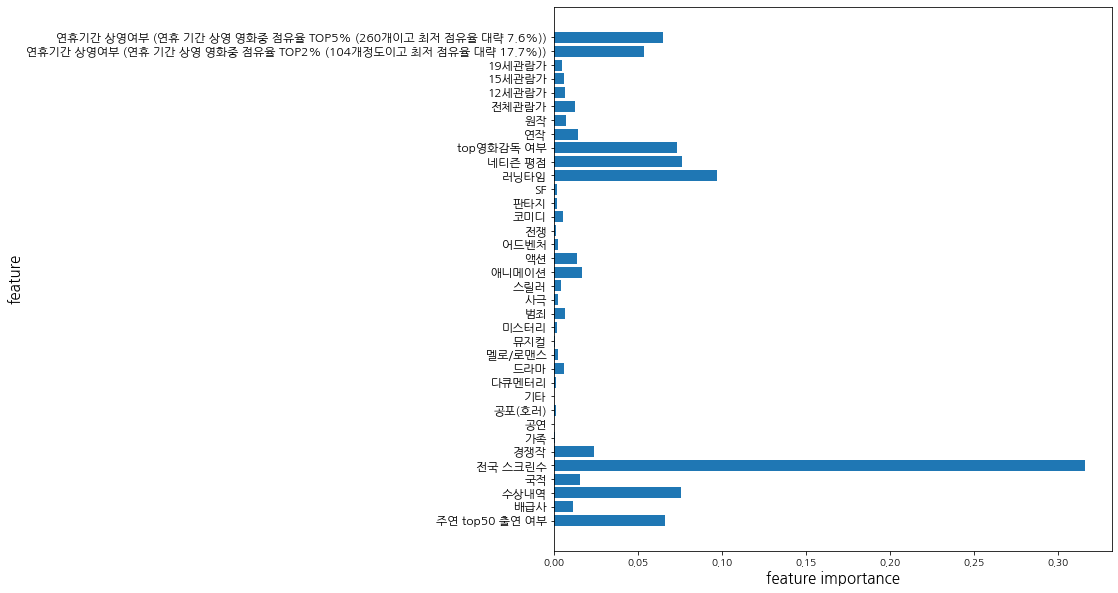

In [ ]:
feature_importance = model.feature_importances_
feature_name = list(x.columns)
n_feature = x_train.shape[1]
idx = np.arange(n_feature)
plt.rcParams["figure.figsize"] = (10,10)
plt.barh(idx, feature_importance, align='center')
plt.yticks(idx, feature_name, size=12)
plt.xlabel('feature importance', size=15)
plt.ylabel('feature', size=15)

plt.show()

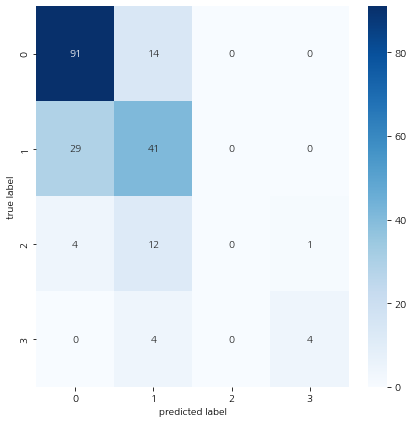

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
results2=np.array(model.predict(x_test))
results1=np.array(y_test)
plt.figure(figsize=(7,7))
cm=confusion_matrix(results1,results2)
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [ ]:
print('\n',classification_report(results1,results2))


               precision    recall  f1-score   support

         0.0       0.73      0.87      0.79       105
         1.0       0.58      0.59      0.58        70
         2.0       0.00      0.00      0.00        17
         3.0       0.80      0.50      0.62         8

    accuracy                           0.68       200
   macro avg       0.53      0.49      0.50       200
weighted avg       0.62      0.68      0.65       200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
